<a href="https://colab.research.google.com/github/Roshan4151/Roshan_Alte_Cardiovascular_Risk_Prediction-Classification-/blob/main/Roshan_Alte_Cardiovascular_Risk_Prediction_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction Project**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**           Roshan Alte

# **Project Summary -**

* The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

* The dataset provides the patients information. It includes over 4,000 records and 15 attributes.

* Now a days people are going more towards sedentary lifestyle. Due to inactive lifestyle and consumption of tobacco the risk of CHD is increasing day by day.

* In this project we will be developing various machine learning models which will predict the 10yr future risk of CHD.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


1. **The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**
2. **In this project our classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) from dataset of an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [112]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from numpy import math
from numpy import loadtxt
from matplotlib import rcParams

from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Classification Project/CSV File/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Tail of the Dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Text(0.5, 1.0, 'Missing/Null Values')

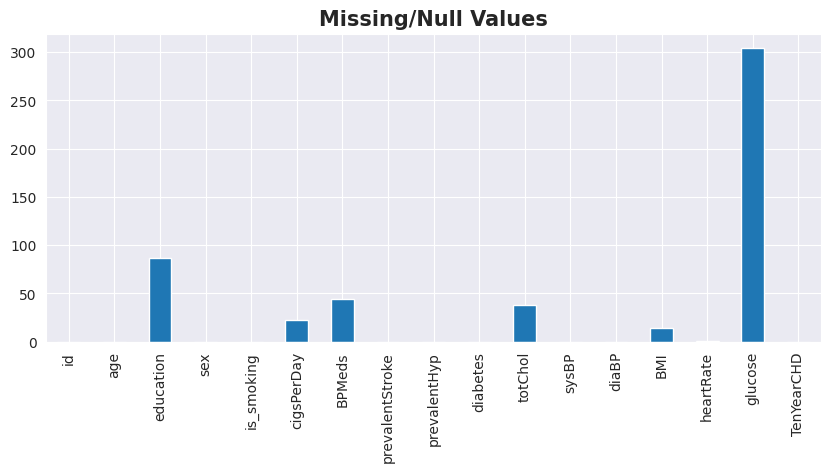

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,4))
df.isnull().sum().plot(kind='bar')
plt.title('Missing/Null Values',fontsize=15,fontweight='bold')

### What did you know about your dataset?

* According to the analysis above, We can say that - 
 1. The dataset comprises **3390** rows and **17** columns.
 2. There are **No duplicate** values in the dataset.
 3. This dataset contains many features which has **Null values**. As we see, there are lots of null values in 'glucose' column. The features 'education', 'cigsPerDay', 'BPMeds', and 'totChol' also has missing values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 

**Demographic**
* Sex: male or female("M" or "F")

* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=False)

id                 3390
BMI                1259
totChol             240
sysBP               226
diaBP               142
glucose             132
heartRate            68
age                  39
cigsPerDay           32
education             4
prevalentHyp          2
diabetes              2
prevalentStroke       2
BPMeds                2
is_smoking            2
sex                   2
TenYearCHD            2
dtype: int64

In [14]:
#printing unique values for feasible columns 
col_of_intrest=['prevalentHyp','diabetes','prevalentStroke','BPMeds','TenYearCHD','sex','is_smoking','education']
for col in col_of_intrest:
  print(f"{col} - {df[col].unique()}")

prevalentHyp - [0 1]
diabetes - [0 1]
prevalentStroke - [0 1]
BPMeds - [ 0. nan  1.]
TenYearCHD - [1 0]
sex - ['F' 'M']
is_smoking - ['YES' 'NO']
education - [ 2.  4.  1.  3. nan]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Replacing all the Null/Missing values of Categorical column with Mode

df['education'].fillna(df['education'].mode()[0],inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)

In [16]:
# Replacing all the Null/Missing values of Numerical columns with Mean

df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)

In [17]:
# Checking the Null/Missing values after Imputation

df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
# This is defined based on the number of unique values for each attribute

dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

### What all manipulations have you done and insights you found?

* Since we have a lot of missing values in our data set , we performed missing value imputation.

* For missing value imputation we segregated columns into categorical and numerical having null values.

* We have replaced Null/Missing values of Categorical columns with the Mode and Numerical values with the Mean.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [20]:
pd.DataFrame(df['TenYearCHD'].value_counts('percentage')*100)

,TenYearCHD
0,84.926254
1,15.073746


<Axes: xlabel='TenYearCHD', ylabel='count'>

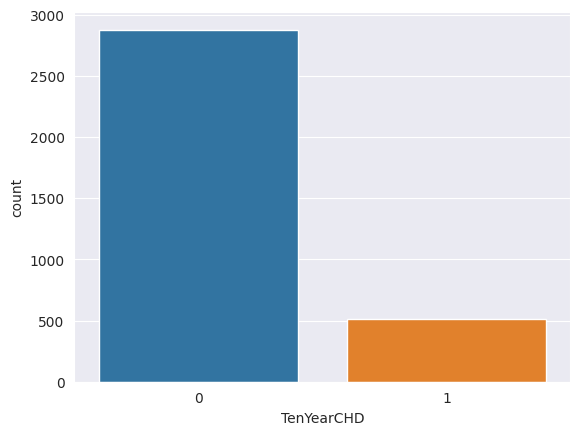

In [21]:
# Chart - 1 visualization code for distribution of Target variable (TenYearCHD)
sns.countplot(x=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

* I have picked this specific chart -
 1. To check the how many peoples are going to affect by Coronay heart disease after 10 years.
 2. To check the distribution of the Target variable (TenYearCHD).

##### 2. What is/are the insight(s) found from the chart?

1. The dependent variable - 10-year risk of coronary heart disease is unbalanced.
2. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 2

In [22]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

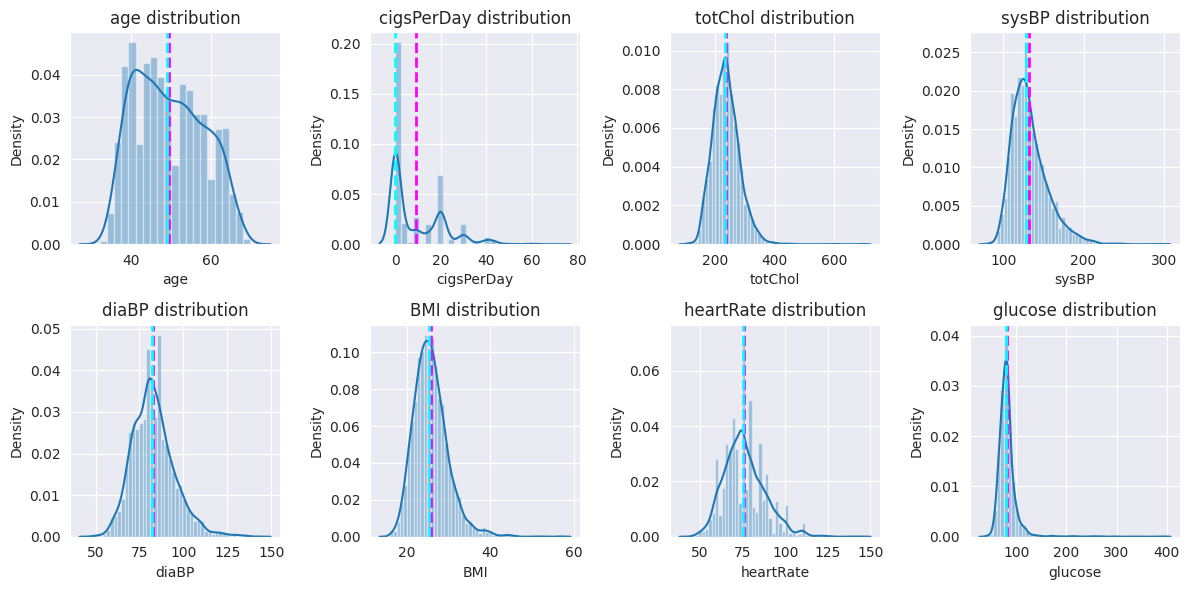

In [23]:
# Chart - 2 visualization code for Checking Skewness

# Checking Skewness
plt.figure(figsize=(12,6))
for n,col in enumerate(continuous_var):
  plt.subplot(2,4,n+1)
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.tight_layout();

##### 1. Why did you pick the specific chart?

* I picked this specific chart to check the Skewness of the continuous variables.

##### 2. What is/are the insight(s) found from the chart?

* From the above distribution plot, We can see that some of the features in the dataset are Skewed and we will deal with it later on.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 3

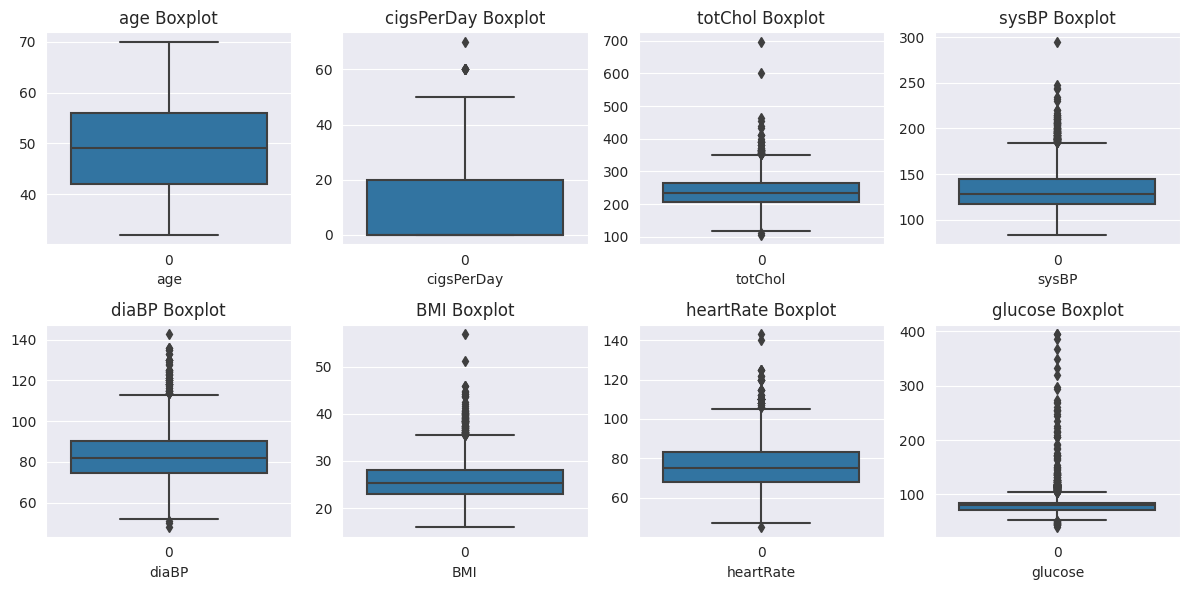

In [24]:
# Chart - 3 visualization code Checking outliers in Continuous variables

plt.figure(figsize=(12,6))
for n,col in enumerate(continuous_var):
  plt.subplot(2,4,n+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.title(col+' Boxplot')
  plt.tight_layout();

##### 1. Why did you pick the specific chart?

* I uesed this specific chart to check the Outliers in our Continuous variables.

##### 2. What is/are the insight(s) found from the chart?

* Some of the features contains the Outliers, we will deal with Ourliers afrewards.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 4

In [25]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

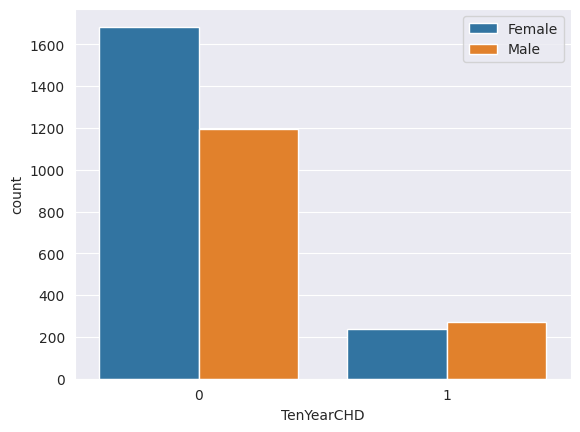

In [26]:
# Chart - 4 visualization code
sns.countplot(x=df['TenYearCHD'],hue=df['sex'])
plt.legend(['Female', 'Male'])

##### 1. Why did you pick the specific chart?

* I picked this speciffic chart to check the distribution of Coronary Heart Disease in Male and Females after Ten Years.

##### 2. What is/are the insight(s) found from the chart?

* From the above countplot we can see that, the chances of Coronary Heart Disease after ten years is quite high in Males as compare to Females.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 5

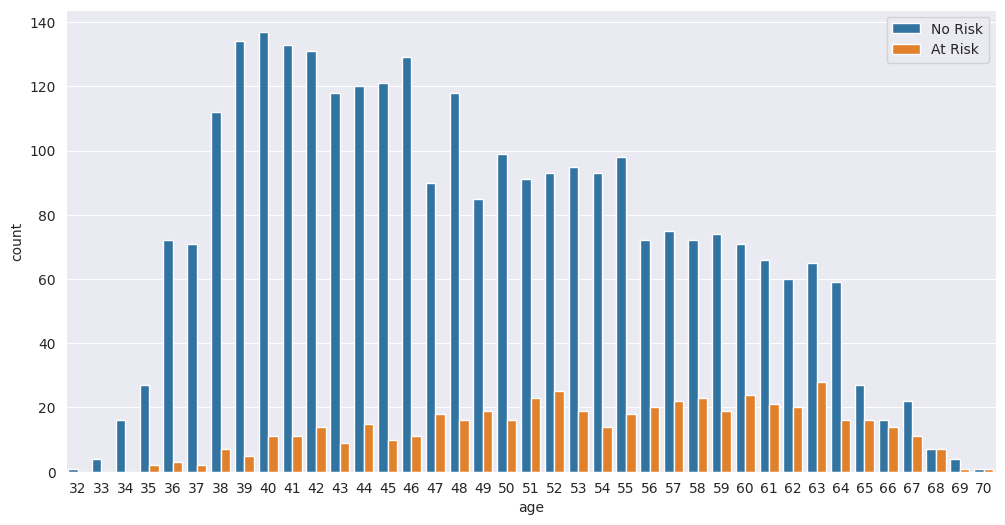

In [27]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(x=df["age"], hue=df["TenYearCHD"])
plt.legend(['No Risk', 'At Risk'])

##### 1. Why did you pick the specific chart?

* I picked this speciffic chart to check the risk of Coronary Heart Disease with respect to Age after ten years.

##### 2. What is/are the insight(s) found from the chart?

* So from the above chart we can see that the Risk of Coronary Heart Disease is Increasing with increase in the Age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 6

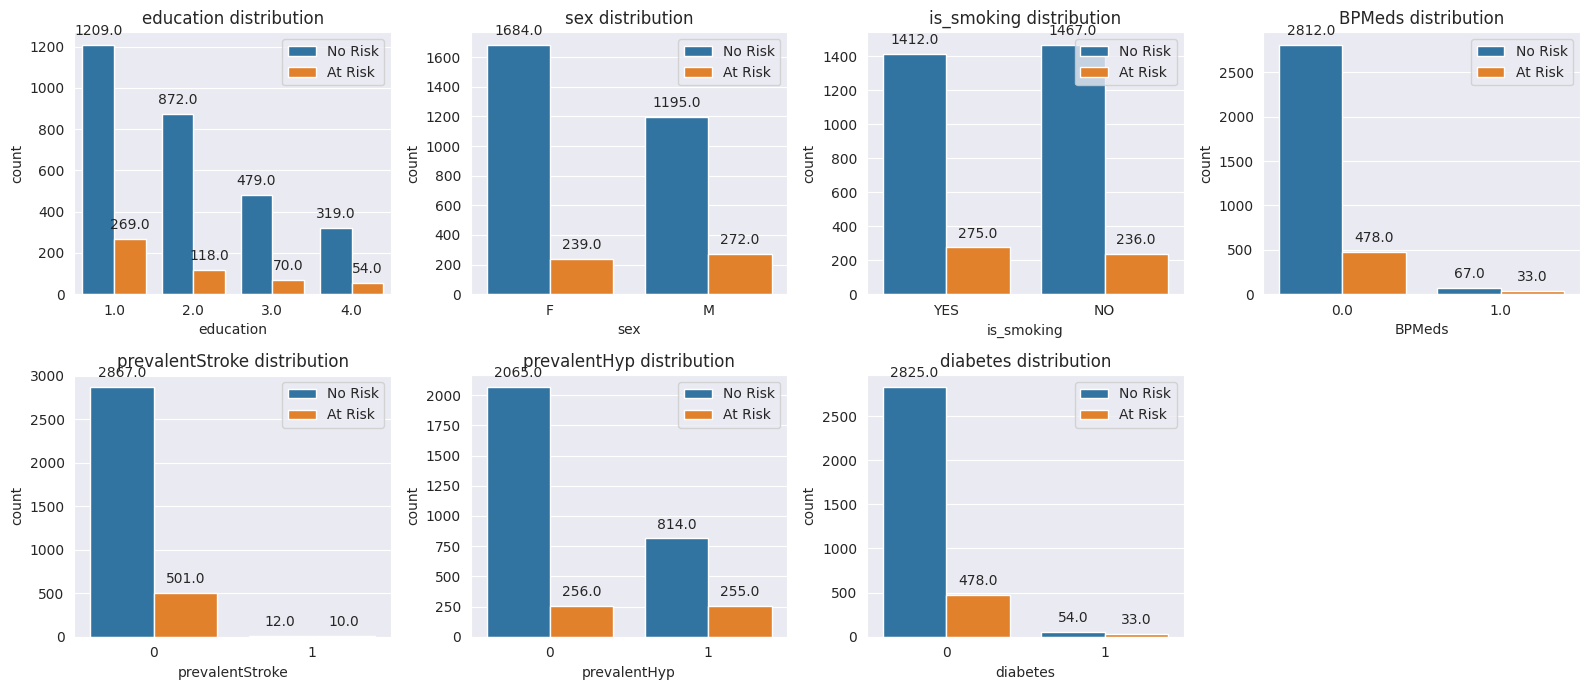

In [28]:
# Chart - 6 visualization code for Distribtion of Categorical variables

plt.figure(figsize=(16,7))
for n,fea in enumerate(categorical_var):
  plt.subplot(2,4,n+1)
  plot=sns.countplot(x=df[fea], hue=df['TenYearCHD'])
  plt.legend(['No Risk', 'At Risk'])
  plt.title(fea+' distribution')
  for i in plot.patches:
    plot.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.tight_layout();

##### 1. Why did you pick the specific chart?

* I have picked this speciffic chaert to check the Distribution of Categorical variables in our Dataset.

##### 2. What is/are the insight(s) found from the chart?

* The Insights are found as follows - 
 1. Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.
 2. There are more female patients compared to male patients.
 3. Almost half the patients are smokers.
 4. 100 patients under the study are undertaking blood pressure medication.
 5. 22 patients under the study have experienced a stroke.
 6. 1069 patients have hypertension.
 7. 87 patients have diabetes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

In [29]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


#### Chart - 7

<Axes: xlabel='age', ylabel='cigsPerDay'>

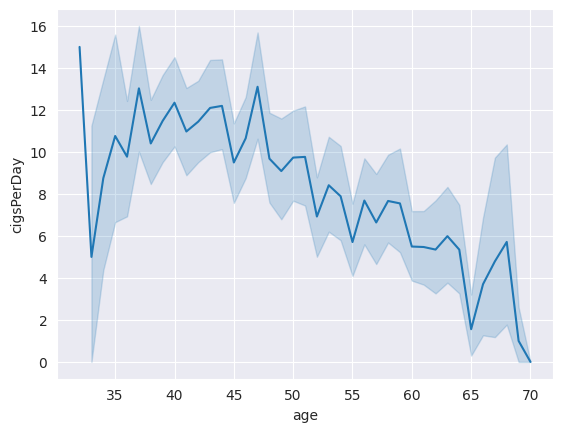

In [30]:
# Chart - 7 visualization code line plot between Target variable and Age 

sns.lineplot(x='age', y='cigsPerDay', data=df)

##### 1. Why did you pick the specific chart?

* I picked this speciffic chart to check the relationship between 'Age' and 'Cigarette/Day'.

##### 2. What is/are the insight(s) found from the chart?

* From the above linechart, it is clearly visible that as the Age of the people increases the cigarette/day consumption by people decreases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 8

In [31]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Text(0.5, 1.0, 'Proportion of patients with and without diabetes at CHD risk')

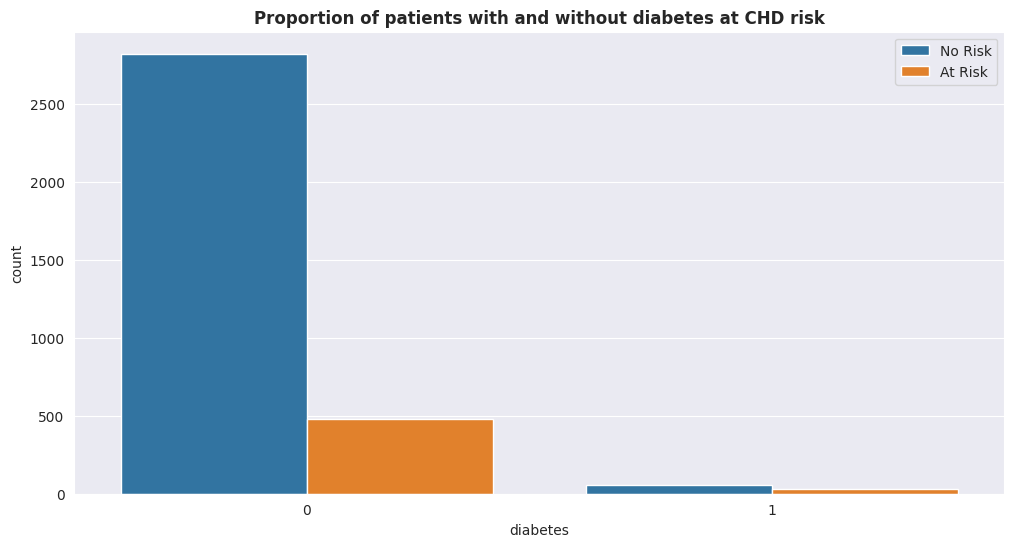

In [32]:
# Chart - 8 visualization code for Proportion of patients with and without diabetes at CHD risk

plt.figure(figsize=(12,6))
sns.countplot(x='diabetes', hue='TenYearCHD', data=df)
plt.legend(['No Risk', 'At Risk'])
plt.title('Proportion of patients with and without diabetes at CHD risk',fontweight='bold')

##### 1. Why did you pick the specific chart?

* This chart was picked to visualize the proportion of patients with and without diabetes who are at risk of developing coronary heart disease in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that patients with diabetes are more likely to be at risk of developing coronary heart disease compared to those without diabetes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

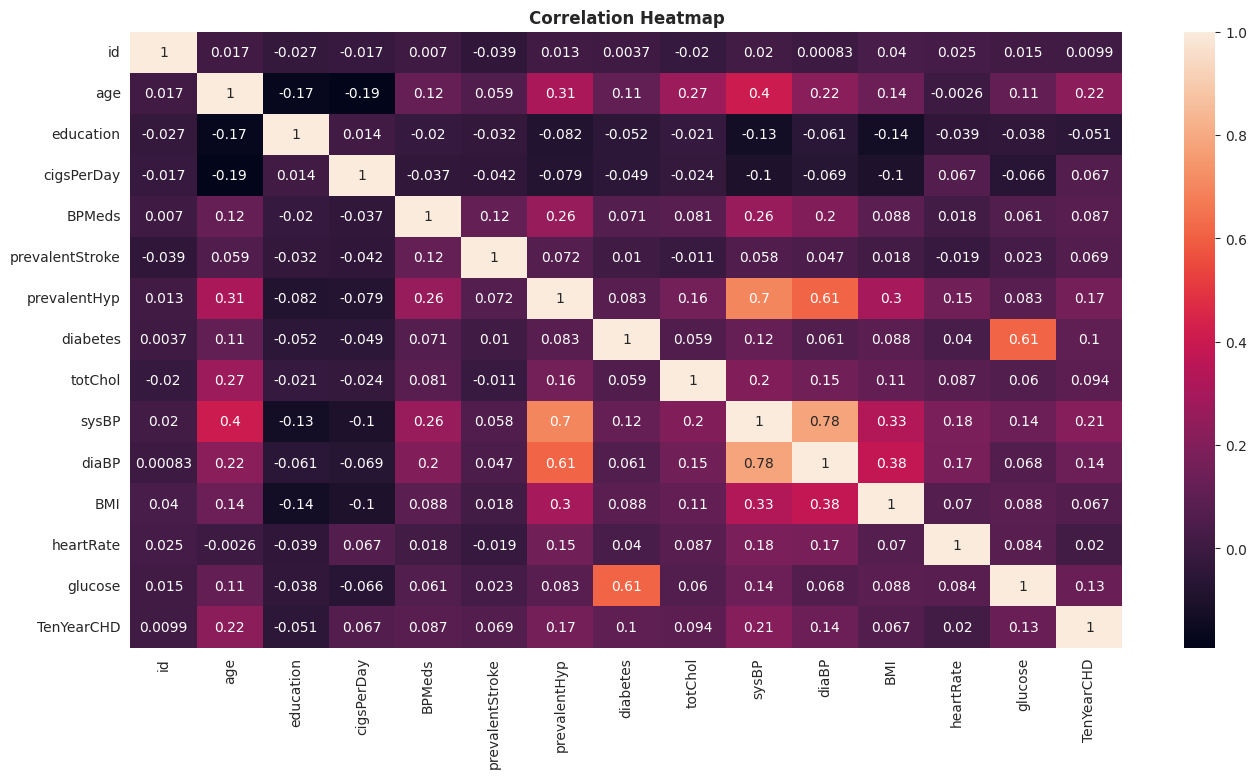

In [33]:
# Correlation Heatmap visualization code

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap',fontweight='bold')

##### 1. Why did you pick the specific chart?

* we have uesd this speciffic chart to check the correlation between each and every feature with each other.

##### 2. What is/are the insight(s) found from the chart?

* Above is the correlation magnitude heatmap for all the continuous variables in the dataset.
* The variables systolic BP and diastolic BP are highly correlated.
* The variables diabetes and glucose are highly correlated.
* The variables systolic BP, diastolic BP and prevalent_hyp are highly correlated.

#### Chart - 15 - Pair Plot 

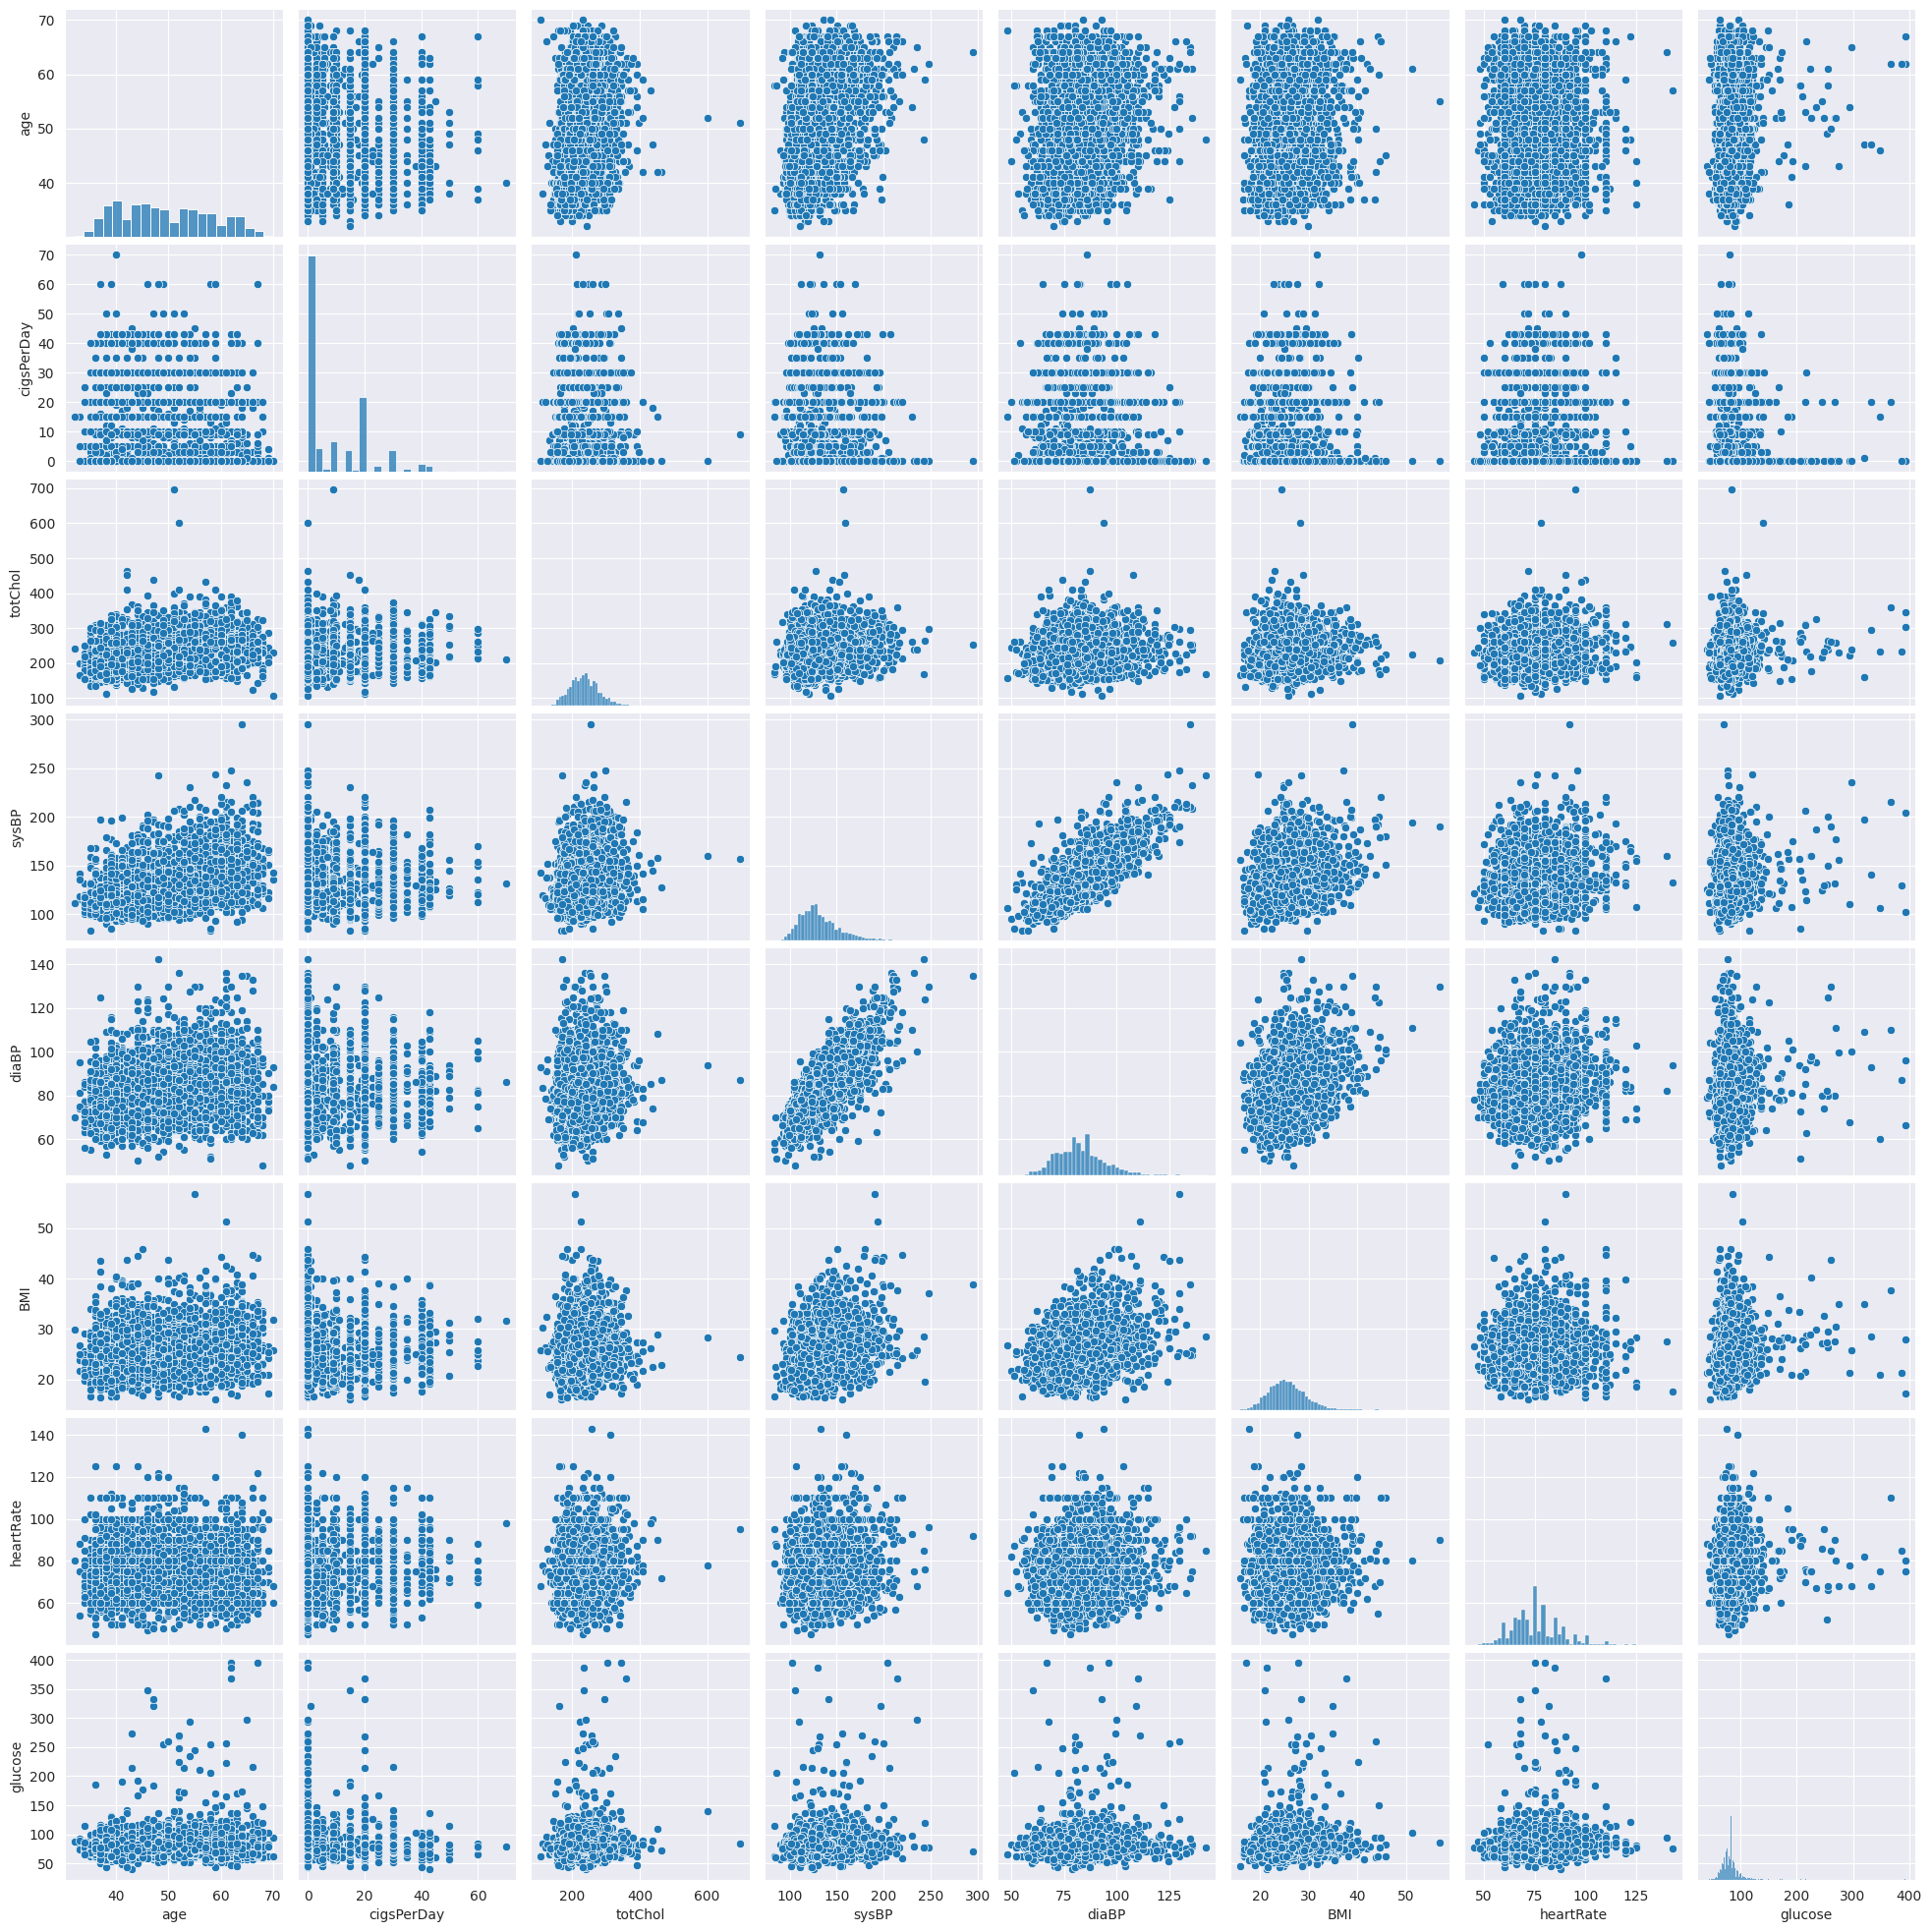

In [34]:
# Pair Plot visualization code
sns.pairplot(df[continuous_var])

##### 1. Why did you pick the specific chart?

* The pair plot is a useful visualization to understand the pairwise relationships between the continuous variables in the dataset. It can help identify any linear or non-linear correlations between the variables, and also identify any potential outliers or unusual patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* From the pair plot, we can see that there are some positive correlations between certain variables, such as age and systolic blood pressure, as well as between BMI and glucose levels. Systolic blood pressure, and diastolic blood pressure are linearly correlated. There also appears to be a weak positive correlation between cigsPerDay and sysBP. However, there does not appear to be a clear linear relationship between any of the variables and the target variable, TenYearCHD

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation

# We have already Handled the Missing/Null values form the dataset.

df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. We have replaced Null/Missing values with Mean in Numerical columns.
2. And we have used the Mode for the Categorical columns.

### 2. Handling Outliers

In [36]:
# Handling Outliers & Outlier treatments

# We are not Removing Outliers.

* Outliers in all other numerical columns are important and thus cannot be removed.

### 3. Categorical Encoding

In [37]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [38]:
# Encode your categorical columns 
# We are doing Label Encoding for better Analysis.

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES', 1,0)

In [39]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

* Here since we have just 2 columns to encode so and that to those are bNinary so we use simple where function of numpy.

* We are replacing male with 1 and female with 0 in case of 'sex' column and in case of 'is_smoking' column , we are providing value of 1 to smokers and 0 to non-smokers.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Text(0.5, 1.0, 'Correlation Heatmap')

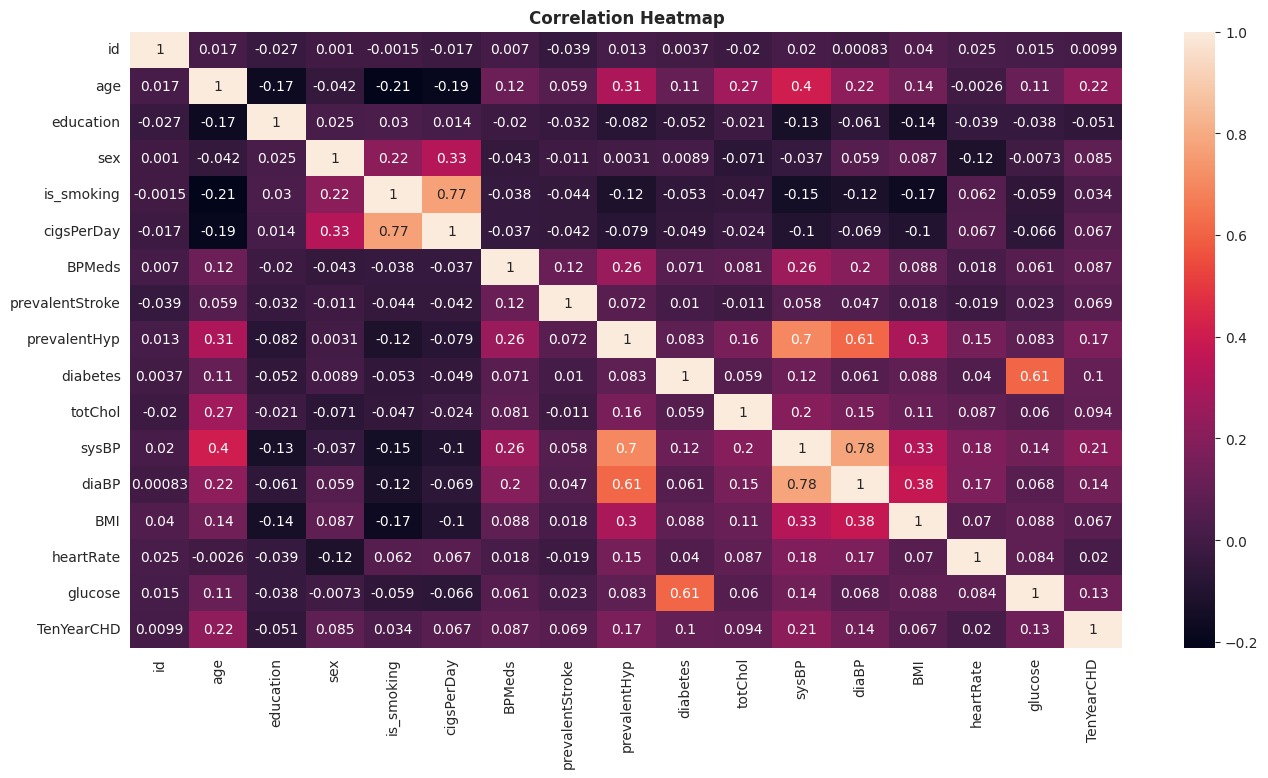

In [40]:
# Manipulate Features to minimize feature correlation and create new features
# Creating the HeatMap for Analysis

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap',fontweight='bold')

From above correlation heatmap we observed that:- 

* 'SysBP' and 'DiaBp' is having high correlation of 0.78.

* 'cigsPerDay' and 'is_smoking' having coorelation of 0.77.

* 'SysBP' and 'prevalentHyp' with 0.72 and 'DiaBp' and 'prevalentHyp' with 0.62.

* **In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'Pulse pressure' is introduced which is the deference between 'SysBP' and 'DiaBp'.**

#### 2. Feature Selection

In [41]:
# Select your features wisely to avoid overfitting

#In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'PP'(Pulse pressure) is introduced which is the deference between 'SysBP' and 'DiaBp'. 
df['Pulse_pre']=abs(df['sysBP']-df['diaBP'])

#removing other irrelevant highly correlated features 
df=df.drop(columns=['id','is_smoking','diabetes','diaBP','sysBP','prevalentHyp'])

Text(0.5, 1.0, 'Correlation Heatmap')

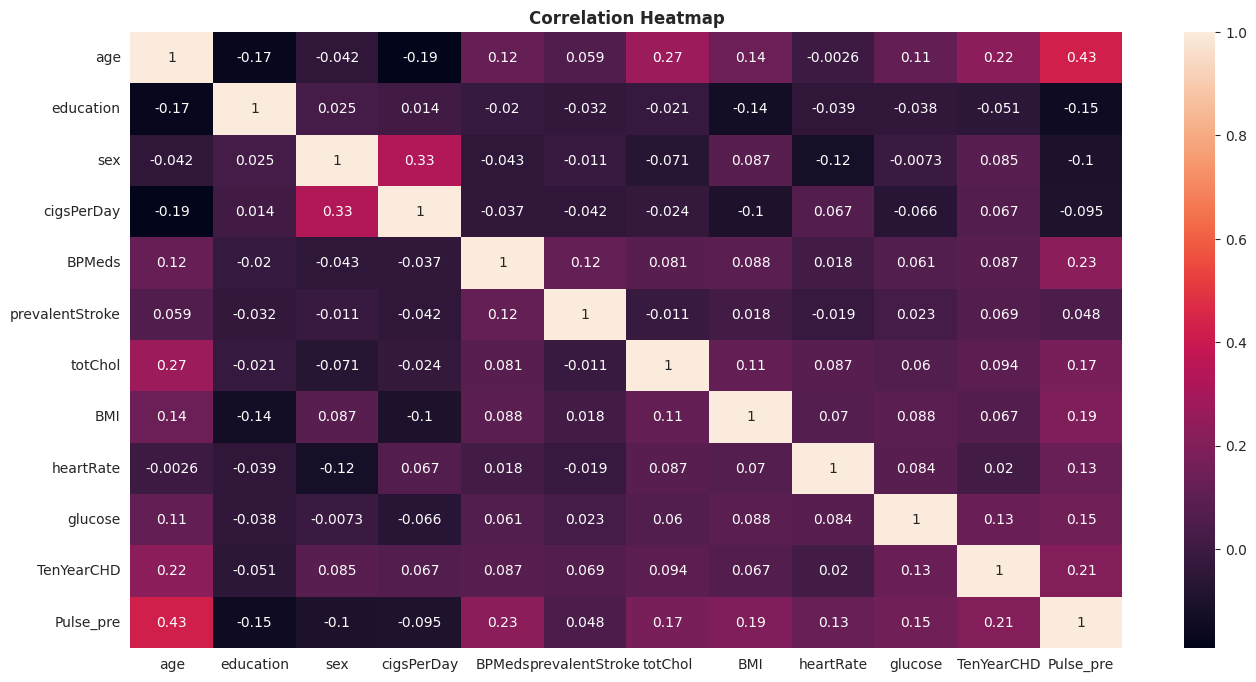

In [42]:
#Rechecking correlation after necessary changes

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap',fontweight='bold')

##### What all feature selection methods have you used  and why?

* Correlation analysis: This method involves measuring the correlation between each feature and the target variable. Features having a high correlation with target variable are generally considered to be good predictors and are therefore selected.

##### Which all features you found important and why?

* From heatmap we can clearly see that sysBP and diaBP are highly correlated and already we have calculated new feature from them i.e. Pulse Pressure. So we are dropping both 'sysBP' and 'diaBP'.

* Dropping 'id' feature because it is not that important for the analysis.

* 'is_smoking'and 'cigsPerDay' columns are highly correlated so we can drop one of them which is ccontributing less in the target variable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation in the context of a classification problem refers to the process of converting or modifying the original features or variables of the dataset to improve the performance of a classification model. 

Here are some common data transformation techniques used in classification problems:


1. **Feature engineering:** Feature engineering involves creating new features or modifying existing features to improve the model's performance. 

2. **Encoding categorical variables:**  Machine learning models require numeric input, so categorical variables need to be encoded before using them in the model. There are several encoding techniques, including one-hot encoding, label encoding, and target encoding

3. **Scaling:** Scaling is a technique used to transform the data to a standard scale, typically between 0 and 1. It can help in reducing the impact of different scales of the features on the model performance.

### 6. Data Scaling

In [43]:
# Creating a copy of our dataset
data = df.copy()
data.shape

(3390, 12)

In [44]:
# Scaling your data

X = data.drop('TenYearCHD', axis=True)
y = data['TenYearCHD']

print(X.shape)
print(y.shape)

(3390, 11)
(3390,)


In [45]:
# Creating object and Applying Standard Scaler
scaler = StandardScaler()

# Fit and Transform
X = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

* StandardScaler scales the data so that the mean is 0 and the standard deviation is 1. It is a commonly used method for scaling data in machine learning because it preserves the shape of the original distribution and is suitable for most machine learning algorithms, especially those that use distance-based measures. StandardScaler is also useful for the features in the data have significantly different scales because it can help to make the features more comparable.

### 7. Data Splitting

In [46]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [47]:
print(f'The shape of x_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (2712, 11)
The shape of y_train is: (2712,)
The shape of x_test is: (678, 11)
The shape of y_test is: (678,)


##### What data splitting ratio have you used and why? 

1. We have used 80-20 split on the data.
2. The train_test_split function from the scikit-learn library was used for this purpose, as it's a common approach for training and testing the model on different data samples.


### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [48]:
# Checking the value counts of the Target variable(TenYearCHD)
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

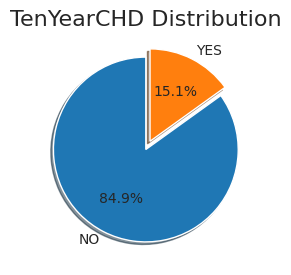

In [49]:
# calculate value counts of 'TenYearCHD' column
counts =data['TenYearCHD'].value_counts()


labels = ['NO','YES']
plt.figure(figsize=(8,3))
plt.pie(counts, labels=labels, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,.1])
plt.title('TenYearCHD Distribution', fontsize=16)
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* Yes, we can clearly see that our dataset is Highly inbalaced.
* The pie chart clearly indicates that the target variable, which is the 10-year risk of coronary heart disease (CHD), is highly imbalanced. Out of the total sample population, 84.9% or 2879 individuals do not have the risk of CHD, while only 15.1% or 511 individuals are at risk. This significant class imbalance in the data could lead to biased predictions and can negatively impact the performance of machine learning models. Therefore, it is necessary to balance the data by applying appropriate techniques such as undersampling or oversampling to improve the accuracy and reliability of the models.

In [50]:
# Handling Imbalanced Dataset (If needed)

# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

In [51]:
# Updating our Train_Test_Split after applying  SMOTE
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [52]:
print(f'The shape of x_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (4606, 11)
The shape of y_train is: (4606,)
The shape of x_test is: (1152, 11)
The shape of y_test is: (1152,)


In [53]:
# Checking the data after applying  SMOTE
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

* Now you can see that, after applying SMOTE our dataset is Balanced right now.

## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [63]:
# ML Model - 1 Implementation
logistic_classifier = LogisticRegression()
# Fit the Algorithm
logistic_classifier.fit(X_train,y_train)
# Predict on the model
y_pred_train1 = logistic_classifier.predict(X_train)
y_pred_test1 = logistic_classifier.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Train Accuracy is 67.13
The Test Accuracy is 67.19
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       553
           1       0.69      0.68      0.68       599

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



<Axes: >

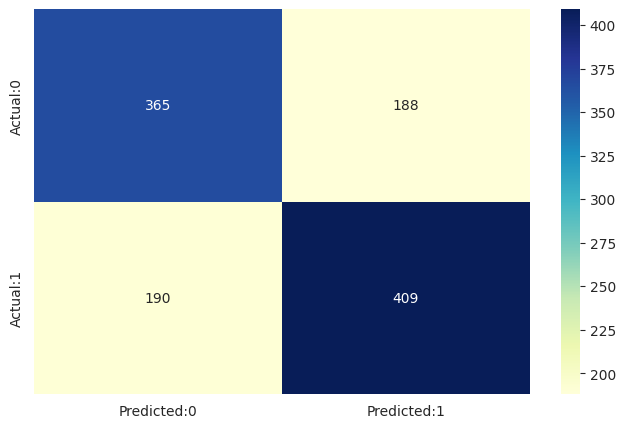

In [115]:
# Visualizing evaluation Metric Score chart

train_accuracy1 = accuracy_score(y_train,y_pred_train1)
test_accuracy1 = accuracy_score(y_test,y_pred_test1)
Precision1 = precision_score(y_test,y_pred_test1)
Recall1 = recall_score(y_test,y_pred_test1)

print(f"The Train Accuracy is {round(train_accuracy1*100,2)}")
print(f"The Test Accuracy is {round(test_accuracy1*100,2)}")
print(classification_report(y_test,y_pred_test1))

# Confusion Matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred_test1)
conf_matrix=pd.DataFrame(data=confusion_matrix1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_classifier_t = GridSearchCV(LogisticRegression(),param_grid=params,cv=5)

# Fit the Model
logistic_classifier_t.fit(X_train,y_train)

# Predict the Model
logistic_classifier_t.predict(X_test)

In [86]:
# Getting the Best Parameters
print("The best fit alpha value is found out to be -",logistic_classifier_t.best_params_)

The best fit alpha value is found out to be - {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}


In [ ]:
# Now make the Predictions
logistic_classifier_t.predict(X_test)

In [92]:
# Storing the Train and Test score in different variables
y_pred_train11 = logistic_classifier_t.predict(X_train)
y_pred_test11 = logistic_classifier_t.predict(X_test)

The Train Accuracy is 67.15%
The Test Accuracy is 67.01%
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       553
           1       0.68      0.68      0.68       599

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



<Axes: >

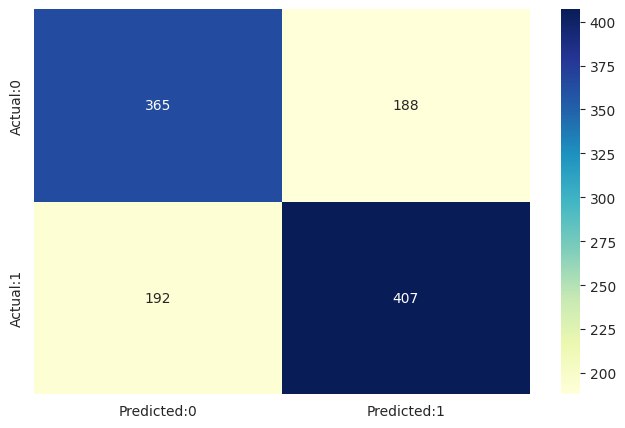

In [116]:
# Visualizing evaluation Metric Score chart

train_accuracy11 = accuracy_score(y_train,y_pred_train11)
test_accuracy11 = accuracy_score(y_test,y_pred_test11)
Precision11 = precision_score(y_test,y_pred_test11)
Recall11 = recall_score(y_test,y_pred_test11)


print(f"The Train Accuracy is {round(train_accuracy11*100,2)}%")
print(f"The Test Accuracy is {round(test_accuracy11*100,2)}%")
print(classification_report(y_test,y_pred_test11))

# Confusion Matrix
confusion_matrix11 = confusion_matrix(y_test,y_pred_test11)
conf_matrix=pd.DataFrame(data=confusion_matrix11,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##### Which hyperparameter optimization technique have you used and why?

* I have used GridSearchCV for hyperparameter tunning.

* GridSearchCV is an effective technique for optimizing the hyperparameters of machine learning models. By evaluating all possible combinations of hyperparameters and their values, GridSearchCV selects the best combination based on performance calculation, resulting in more accurate results and improved model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We optimized our ML model's performance by using GridSearchCV to search for the best hyperparameters. This technique tried all possible combinations of hyperparameters and provided the most accurate results by selecting the best values.

* But still we are not able to see any improvement in results. we got Test accuracy of 67.01%.That's not enough.

### ML Model - 2 - Random Forest Classifier

In [93]:
# ML Model - 2 Implementation
rf = RandomForestClassifier()
# Fit the Algorithm
rf.fit(X_train,y_train)
# Predict on the model
y_pred_train2 = rf.predict(X_train)
y_pred_test2 = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Train Accuracy is 100.0%
The Test Accuracy is 88.37%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       553
           1       0.89      0.89      0.89       599

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152



<Axes: >

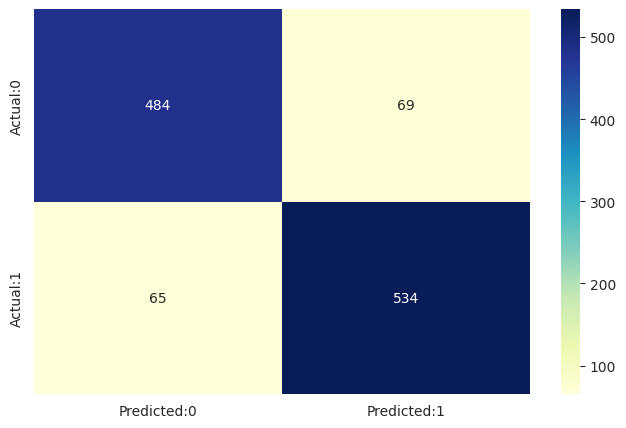

In [117]:
# Visualizing evaluation Metric Score chart
train_accuracy2 = accuracy_score(y_train,y_pred_train2)
test_accuracy2 = accuracy_score(y_test,y_pred_test2)
Precision2 = precision_score(y_test,y_pred_test2)
Recall2 = recall_score(y_test,y_pred_test2)

print(f"The Train Accuracy is {round(train_accuracy2*100,2)}%")
print(f"The Test Accuracy is {round(test_accuracy2*100,2)}%")
print(classification_report(y_test,y_pred_test2))

# Confusion Matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred_test2)
conf_matrix=pd.DataFrame(data=confusion_matrix1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_t = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(rf_t, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(X_train, y_train)
# Predict on the model
y_pred_train22 = random_forest_best.predict(X_train)
y_pred_test22  = random_forest_best.predict(X_test)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


The Train Accuracy is 100.0%
The Test Accuracy is 89.58%
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       553
           1       0.90      0.90      0.90       599

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152



<Axes: >

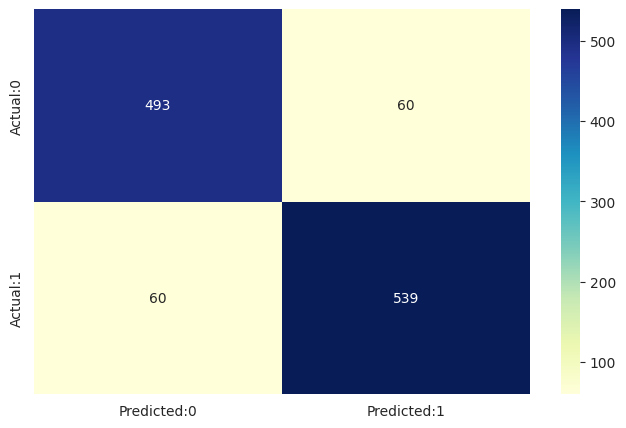

In [119]:
# Printing the scores
train_accuracy22 = accuracy_score(y_train,y_pred_train22)
test_accuracy22 = accuracy_score(y_test,y_pred_test22)
Precision22 = precision_score(y_test,y_pred_test22)
Recall22 = recall_score(y_test,y_pred_test22)

print(f"The Train Accuracy is {round(train_accuracy22*100,2)}%")
print(f"The Test Accuracy is {round(test_accuracy22*100,2)}%")
print(classification_report(y_test,y_pred_test22))

# Confusion Matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred_test22)
conf_matrix=pd.DataFrame(data=confusion_matrix1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##### Which hyperparameter optimization technique have you used and why?

* I have used GridSearchCV for hyperparameter tunning.
* The use of GridSearchCV is a powerful method for fine-tuning the hyperparameters of machine learning models. By exhaustively searching through all possible combinations of hyperparameters and their values, GridSearchCV can identify the best combination for maximizing model performance, leading to more accurate results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* By using GridSearchCV, we were able to improve the performance of our machine learning model by identifying the best hyperparameters. GridSearchCV evaluates all possible combinations of hyperparameters and selects the optimal values for maximizing model performance, resulting in the most accurate results.

* We got best parameters as 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200 after hyperparameter tuning.

* After hyperparameters tuning we got train accuracy as 100% but not the test accuracy. Still we are able to improve the accuracy from 83.37% to 89.58%.

### ML Model - 3 - XGBoost Classifier

In [106]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(X_train,y_train)
# Predict on the model
y_pred_train3 = xgb.predict(X_train)
y_pred_test3 = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Train Accuracy is 99.13%
The Test Accuracy is 88.37%
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       553
           1       0.92      0.85      0.88       599

    accuracy                           0.88      1152
   macro avg       0.89      0.89      0.88      1152
weighted avg       0.89      0.88      0.88      1152



<Axes: >

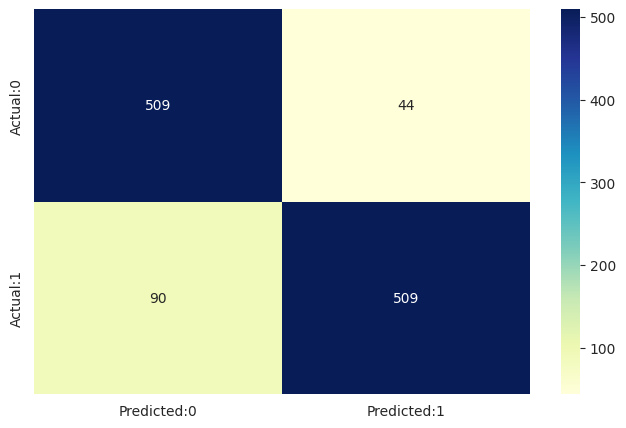

In [120]:
# Visualizing evaluation Metric Score chart

train_accuracy3 = accuracy_score(y_train,y_pred_train3)
test_accuracy3 = accuracy_score(y_test,y_pred_test3)
Precision3 = precision_score(y_test,y_pred_test3)
Recall3 = recall_score(y_test,y_pred_test3)

print(f"The Train Accuracy is {round(train_accuracy3*100,2)}%")
print(f"The Test Accuracy is {round(test_accuracy3*100,2)}%")
print(classification_report(y_test,y_pred_test3))

# Confusion Matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred_test3)
conf_matrix=pd.DataFrame(data=confusion_matrix1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### 2. Cross- Validation & Hyperparameter Tuning

In [110]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# Predict on the model
best_estimator = grid_search.best_estimator_
y_pred_train33 = best_estimator.predict(X_train)
y_pred_test33 = best_estimator.predict(X_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


The Train Accuracy is 98.61%
The Test Accuracy is 89.06%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       553
           1       0.92      0.87      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152



<Axes: >

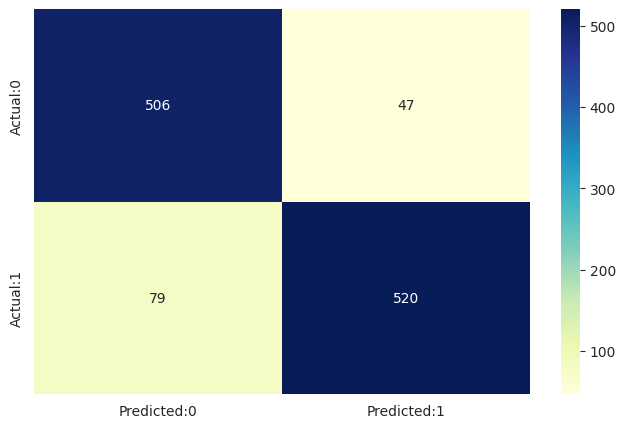

In [121]:
# Visualizing evaluation Metric Score chart

train_accuracy33 = accuracy_score(y_train,y_pred_train33)
test_accuracy33 = accuracy_score(y_test,y_pred_test33)
Precision33 = precision_score(y_test,y_pred_test33)
Recall33 = recall_score(y_test,y_pred_test33)

print(f"The Train Accuracy is {round(train_accuracy33*100,2)}%")
print(f"The Test Accuracy is {round(test_accuracy33*100,2)}%")
print(classification_report(y_test,y_pred_test33))

# Confusion Matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred_test33)
conf_matrix=pd.DataFrame(data=confusion_matrix1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##### Which hyperparameter optimization technique have you used and why?

* In order to optimize the hyperparameters of our machine learning model, we employed the use of GridSearchCV. This method is highly effective as it evaluates all possible combinations of hyperparameters and their values, ultimately selecting the best combination based on performance calculations. This results in improved model performance and more accurate results

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We utilized GridSearchCV to optimize the performance of our machine learning model by exhaustively evaluating all possible hyperparameter combinations to identify the optimal values. This led to more accurate results and improved model performance.

* We got best parameters as 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200 after hyperparameter tuning.

* The accuracy of our model improved slightly from 88.37% to 89.06%. which is considered good.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* Here Predicting TenYearCHD considered as classification problem, where the goal is to predict a outcome variable (TenYearChd) based on one or more predictor variables.

 1. **Accuracy:** Accuracy is a commonly used metric to evaluate the performance of a classification model. It measures the percentage of correctly classified instances among all instances. A higher accuracy score indicates a better performance of the model in predicting the correct class for each instance.

 2. **Precision:** Precision is a metric that measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated by dividing the number of true positives by the sum of true positives and false positives. A higher precision score indicates that the model has a lower rate of false positives, which is important in applications where false positives have a high cost.

 3. **Recall:** Recall, also known as sensitivity or true positive rate, is a metric that measures the proportion of true positive predictions among all instances that actually belong to the positive class. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. A higher recall score indicates that the model has a lower rate of false negatives, which is important in applications where false negatives have a high cost.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [125]:
# Defining the comparison of Models after Hyperparameter Tunning
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':test_accuracy1, 'Precision':Precision1, 'Recall':Recall1},
    "Logistic regression Tuned":{'Accuracy':test_accuracy11, 'Precision':Precision11, 'Recall':Recall11},
    "Random Forest":{'Accuracy':test_accuracy2, 'Precision':Precision2,'Recall':Recall2},
    "Random Forest Tuned":{'Accuracy':test_accuracy22, 'Precision':Precision22,'Recall':Recall22},
    "XG Boost":{'Accuracy':test_accuracy3, 'Precision':Precision3,'Recall':Recall3},
    "XG Boost Tuned":{'Accuracy':test_accuracy33, 'Precision':Precision33,'Recall':Recall33},

})

In [127]:
# Display the Comparison Score of Testing
comparison

,Logistic regression,Logistic regression Tuned,Random Forest,Random Forest Tuned,XG Boost,XG Boost Tuned
Accuracy,0.671875,0.670139,0.883681,0.895833,0.883681,0.890625
Precision,0.685092,0.684034,0.885572,0.899833,0.920434,0.917108
Recall,0.682805,0.679466,0.891486,0.899833,0.849750,0.868114


* Based on the results of the different models tested on the cardiovascular risk prediction project, it appears that the **Random Forest Classifier** and **XGBoost models** are the best options to use for the final prediction model. Both models have high accuracy scores of 0.8958 and 0.8906 respectively, which is essential for use in real-time prediction systems. Additionally, the precision and recall scores of these models are also high, indicating that they are good at correctly predicting positive and negative cases.

So, I am choosing **Random Forest Classifier model** as best fit classification model for **Cardiovascular Risk Prediction** dataset.

# **Conclusion**

1. From EDA - 
* Men are more likely to develop CHD than women.
* Smoking is a risk factor for CHD, and smoking intensity plays a role in determining the risk.
* Patients who have had a prevalent stroke and prevalent hypertension are more likely to be at risk for CHD.
* Total cholesterol levels are slightly higher in patients at risk for CHD
* There is a positive relationship between certain variables such as age and systolic blood pressure, BMI and glucose levels.


2. From Model Implementation -
* Among the Three models tested, the Random Forest Classifier and XGBoost models performed the best, with high accuracy, precision, and recall scores.

* The Logistic Regression model had a lower accuracy and precision, Recall score, indicating that it may not be as suitable for this particular classification problem.

* **The Random Forest Classifier model had slightly higher test accuracy** and Recall scores than the XGBoost, suggesting that it may be a better choice for predicting cardiovascular risk.

* Based on the results presented, **the Random Forest Classifier** model was chosen as the best fit classification model for the cardiovascular risk prediction dataset **having accuracy of 89.58%.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***